# Recurrent Neural Networks

**Recurrent Neural Network** introduced cycles and notion of time.  
![rnn](rnn.png)

We can unroll the RNN as follows:

![unrolled_rnn](unrolled_rnn.png)

### How to compute the forward and backward propogation for recurrent neural network?

For every timestep $t$, $h_t$ and $y_t$ is computed with the following formulas:

$$h_t = \text{tanh}(W_{hh}h_{t-1} + W_{xh}x_t)$$

$$y_t = W_{hy}h_t$$

Note same function and same parameter is used at every timestep.  Moreoever, we need to across time before calculating higher level parameters.


# Types of Recurrent Neural Networks

## Data Input

Recall for non-recurrent neural network, the dimension of data input is $x \in \mathbb{R}^{N, M}$ where $N$ is number of data points and $M$ is number of features.  

For recurrent neural network, we will add an additional dimension $T$, which represents the *timestamp*.  

In [1]:
# (Example network for image captioning in tensorboard)
from coco_input import *
import matplotlib.pyplot as plt
import PIL
data_dir = '/home/karen/workspace/data/cocodataset/'
coco_data = CocoCaptionData(data_dir)

In [2]:
caption_data, features = coco_data.sample_data()

In [ ]:
for c in caption_data['caption']:
    l = c.split(" ")
    print(l[0].encode("utf-8"))
    break

In [ ]:
def get_vocab(caption_data):
    vocab_data = set()
    for c in caption_data:
        for v in c.split(" "):
            vocab_data.add(v)
    return list(vocab_data)

In [3]:
randint = np.random.randint(len(features))
image_id = caption_data["image_id"][randint]
caption = caption_data["caption"][randint]
sample_image_id = features
# img_url = features[sample_image_id]
filename = sample_image_id[image_id]
# d = coco_data.dict_data


(500, 375)


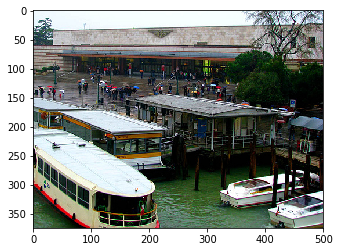

many small boats in a harbor in a body of water


In [4]:
im = PIL.Image.open(filename)
plt.imshow(im)
print(im.size)
plt.show()
print(caption)

In [5]:
input_fn = coco_data.coco_input(data_dir, True, False, False, 1, 500, 64)

In [6]:
print(input_fn())

TypeError: Expected binary or unicode string, got array([b'A', b'bicycle', b'replica', b'with', b'a', b'clock', b'as',
       b'the', b'front', b'wheel.'], dtype='|S7')

### Sample Models with RNN

![onetomany](12many.png)

**Image captioning**: image captioning would require one input and output frome many recurrent cells.

In [ ]:
def conv_model(inputs):
    return tf.layers.conv2d(inputs, 32, 7)

def rnn_model(output_length=3):
    middle_level_cell = tf.contrib.rnn.BasicRNNCell(num_units=output_length)
    output_level_cell = tf.contrib.rnn.BasicRNNCell(num_units=output_length)
    stacked_rnn = tf.contrib.rnn.MultiRNNCell([middle_level_cell, output_level_cell])
    return stacked_rnn

def model(inputs):
    
    inputs = conv_model(inputs)
    initial_state = rnn.zero_state(N, tf.float32)
    state = initial_state

In [ ]:
word_to_id = get_vocab(caption_data["caption"])
word_map = {v:i for i,v in enumerate(word_to_id)}
VOCAB_SIZE = len(word_to_id)
EMBEDDING_SIZE = 32
def model_fn(features, labels, mode, params):
    inputs = features["img"]
    word_to_id = labels.split(" ")
    embeddings = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBEDDING_SIZE], -1.0, 1.0))
    
    inputs = conv_model(inputs)
    rnn = rnn_model(3)
    inputs = rnn(inputs, state)

In [ ]:
# hardware configuration
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
run_config = tf.estimator.RunConfig(session_config=config)

# Definition of Estimators
classifier = tf.estimator.Estimator(model_fn=model_fn, 
                                    model_dir="path/to/save/model", 
                                    config=run_config,
                                    params=None)

In [ ]:
classifier.train(input_fn, max_steps=1)

# Problems with RNN